# `porosimetry`
This is essentially a drainage algorithm but returns a list of invasion sizes which can be analzyed to extract the pore size distribution.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import porespy as ps

ps.visualization.set_mpl_style()

The arguments and their defaults are:

In [2]:
import inspect

inspect.signature(ps.filters.porosimetry)

<Signature (im: numpy.ndarray[typing.Any, numpy.dtype[+_ScalarType_co]], sizes: int = 25, inlets=None, access_limited: bool = True, mode: Literal['hybrid', 'dt', 'mio'] = 'hybrid', parallel_kw: dict = {'divs': 1})>

## `im`
The function works on 2D and 3D images:

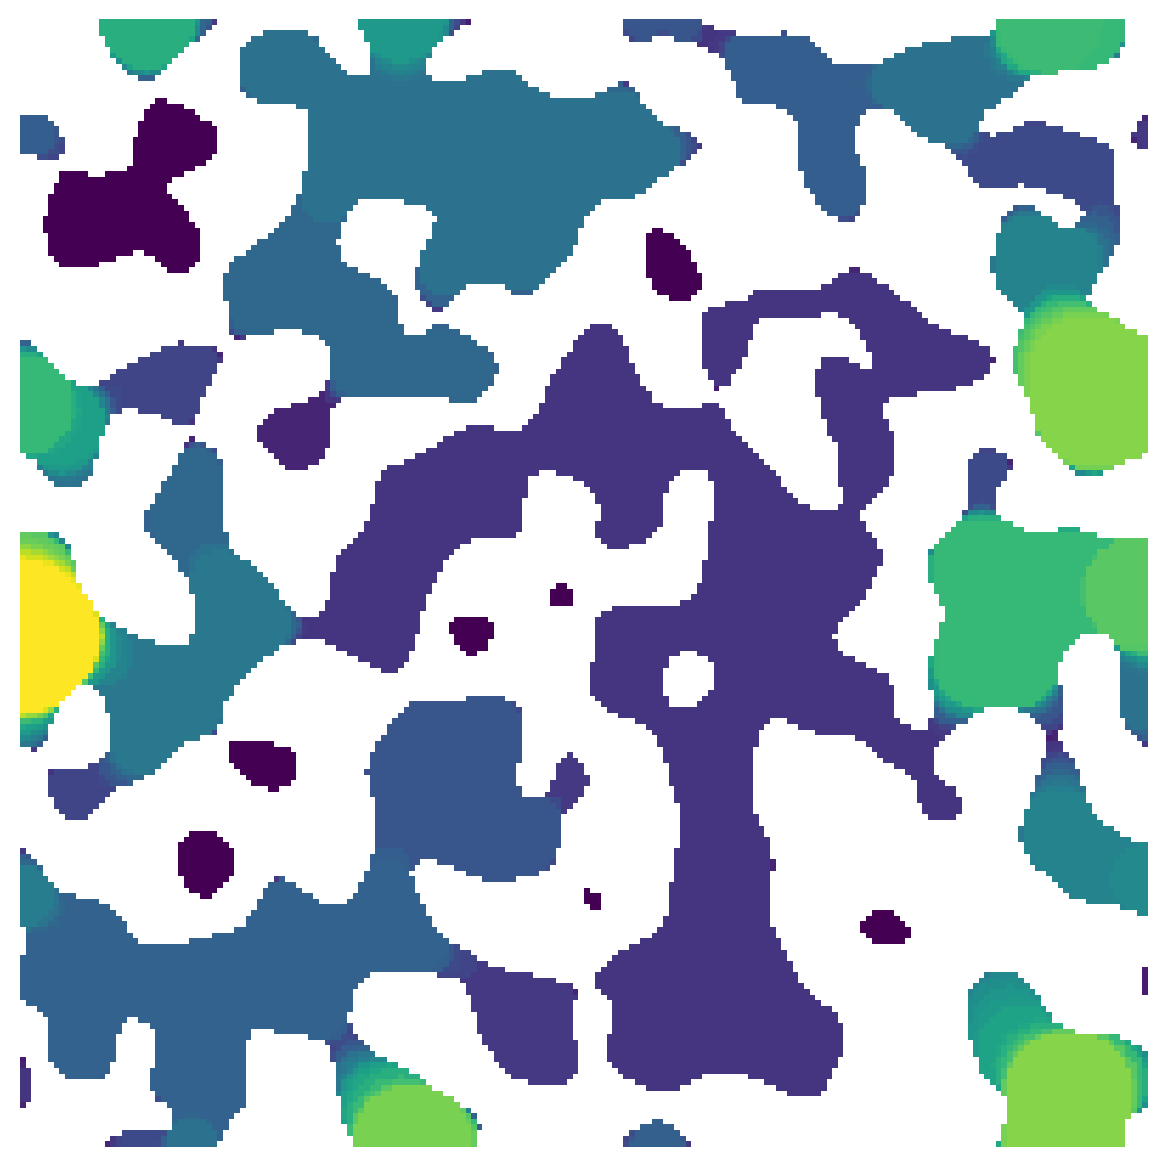

In [2]:
im = ps.generators.blobs(shape=[200, 200])
sizes = ps.filters.porosimetry(im=im)
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(sizes/im, origin='lower', interpolation='none')
ax.axis(False);

A cumulative histogram of the voxel values is analogous to a porosimetry experiment:

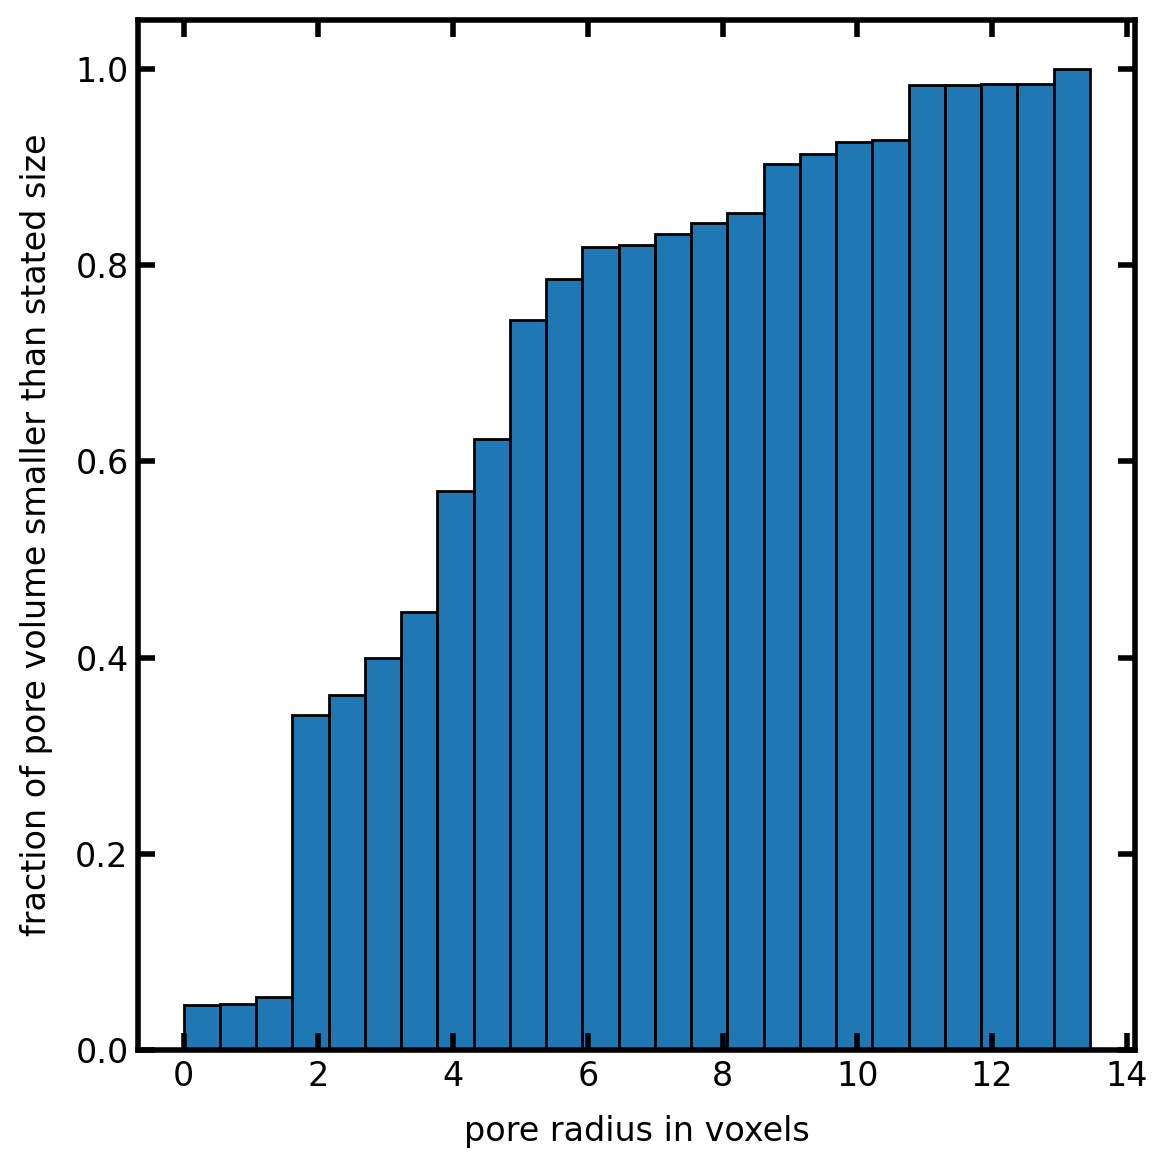

In [3]:
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.hist(sizes[im], bins=25, cumulative=True, edgecolor='k', density=True)
ax.set_xlabel('pore radius in voxels')
ax.set_ylabel('fraction of pore volume smaller than stated size');

## `sizes`
The number of bins to use, or a list of actual bins to use:

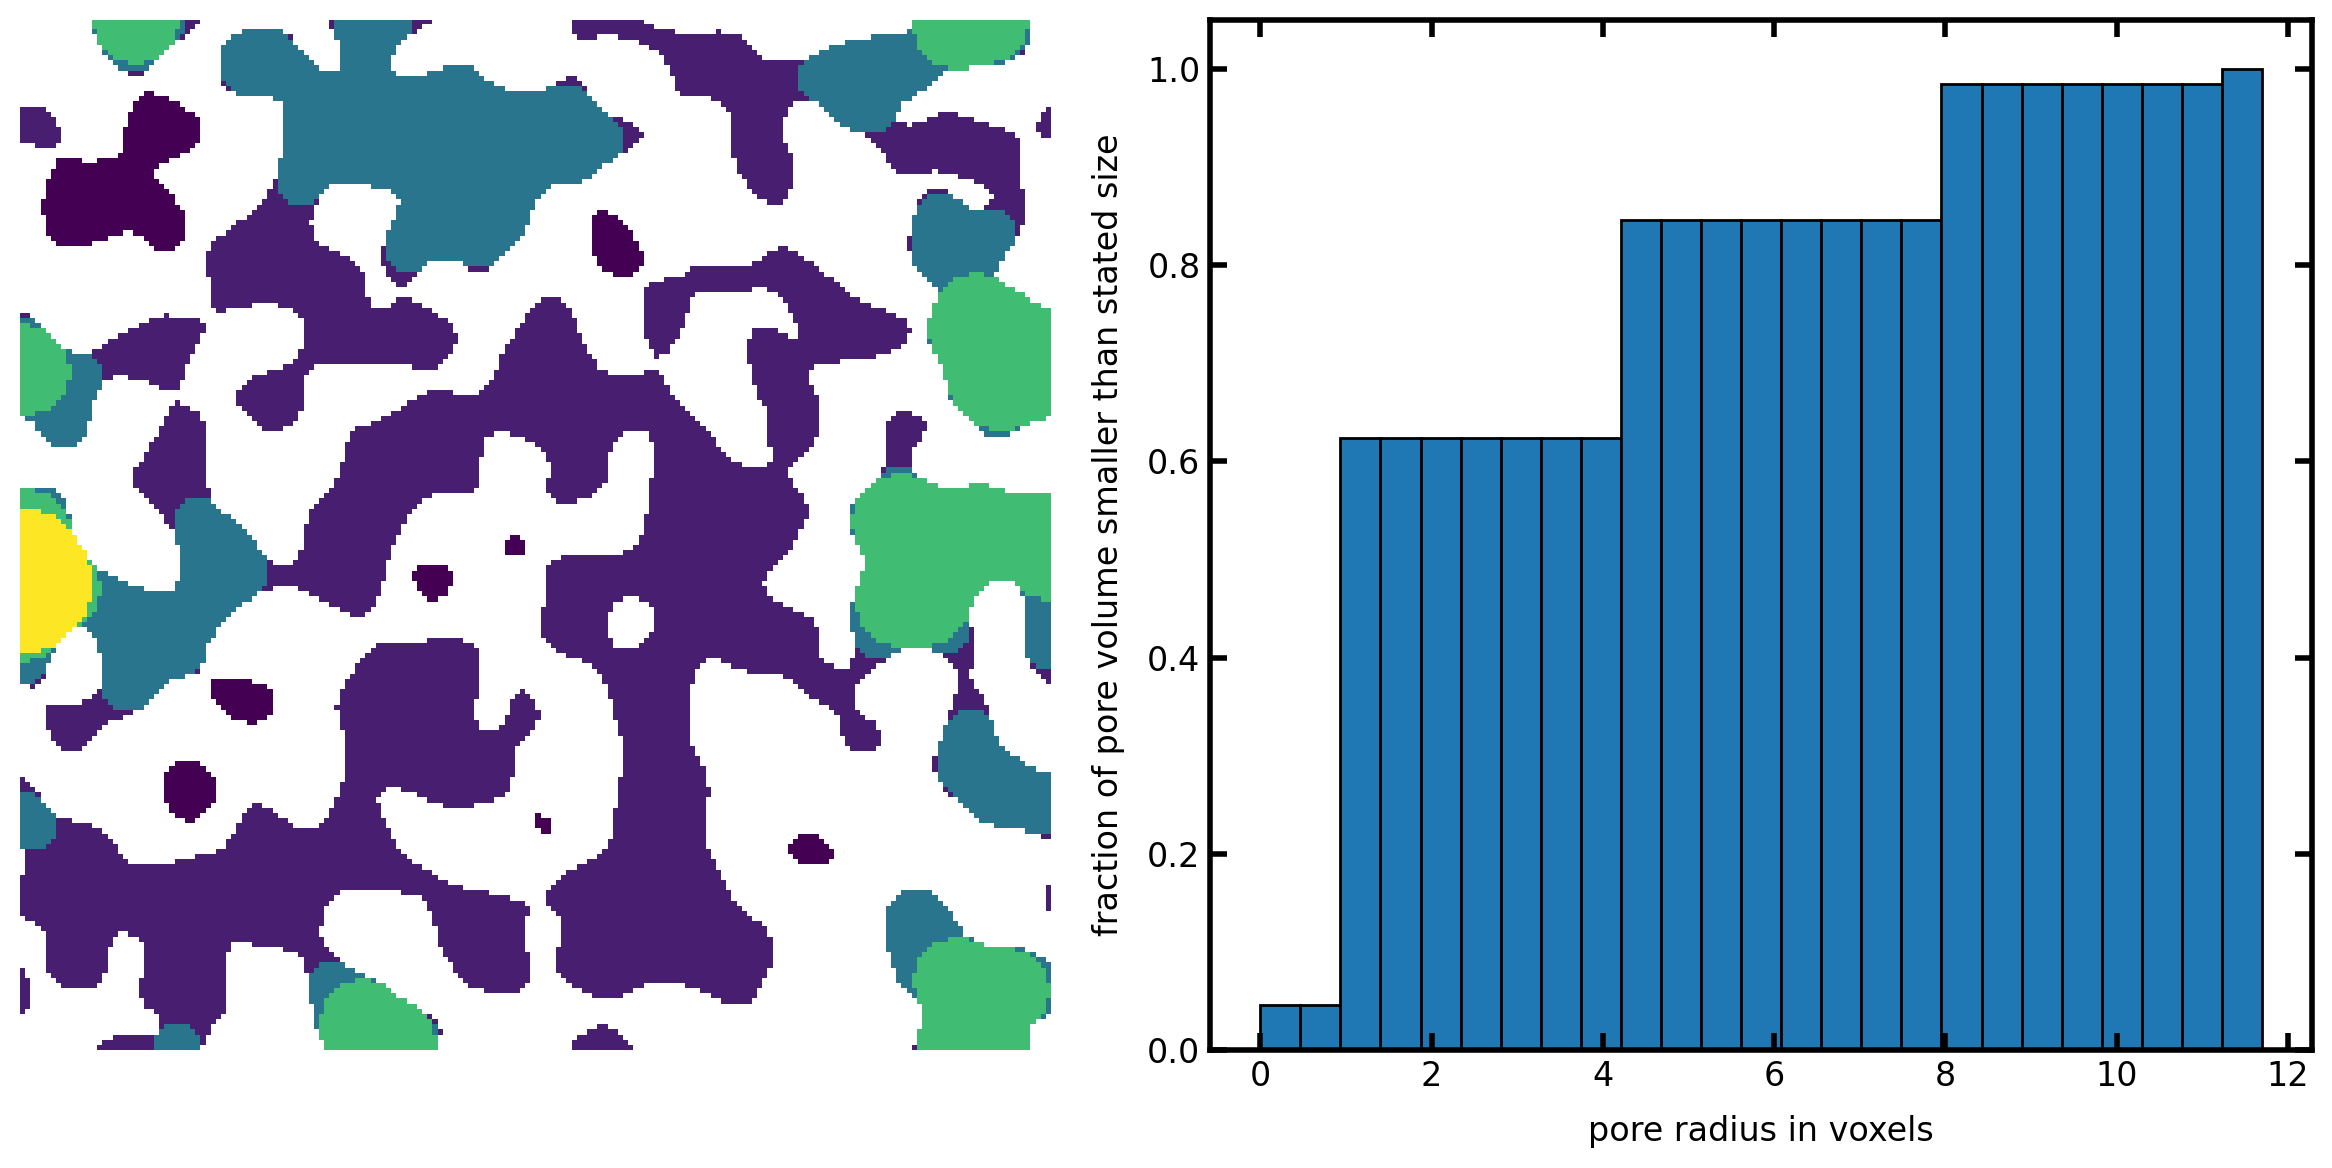

In [4]:
sizes = ps.filters.porosimetry(im=im, sizes=5)
fig, ax = plt.subplots(1, 2, figsize=[12, 6])
ax[0].imshow(sizes/im, origin='lower', interpolation='none')
ax[0].axis(False)
ax[1].hist(sizes[im], bins=25, cumulative=True, edgecolor='k', density=True)
ax[1].set_xlabel('pore radius in voxels')
ax[1].set_ylabel('fraction of pore volume smaller than stated size');

## `inlets`
By default the invading fluid enters from all sizes (typical of a porosimetry experiment), but this can be controlled by specifying inlets:

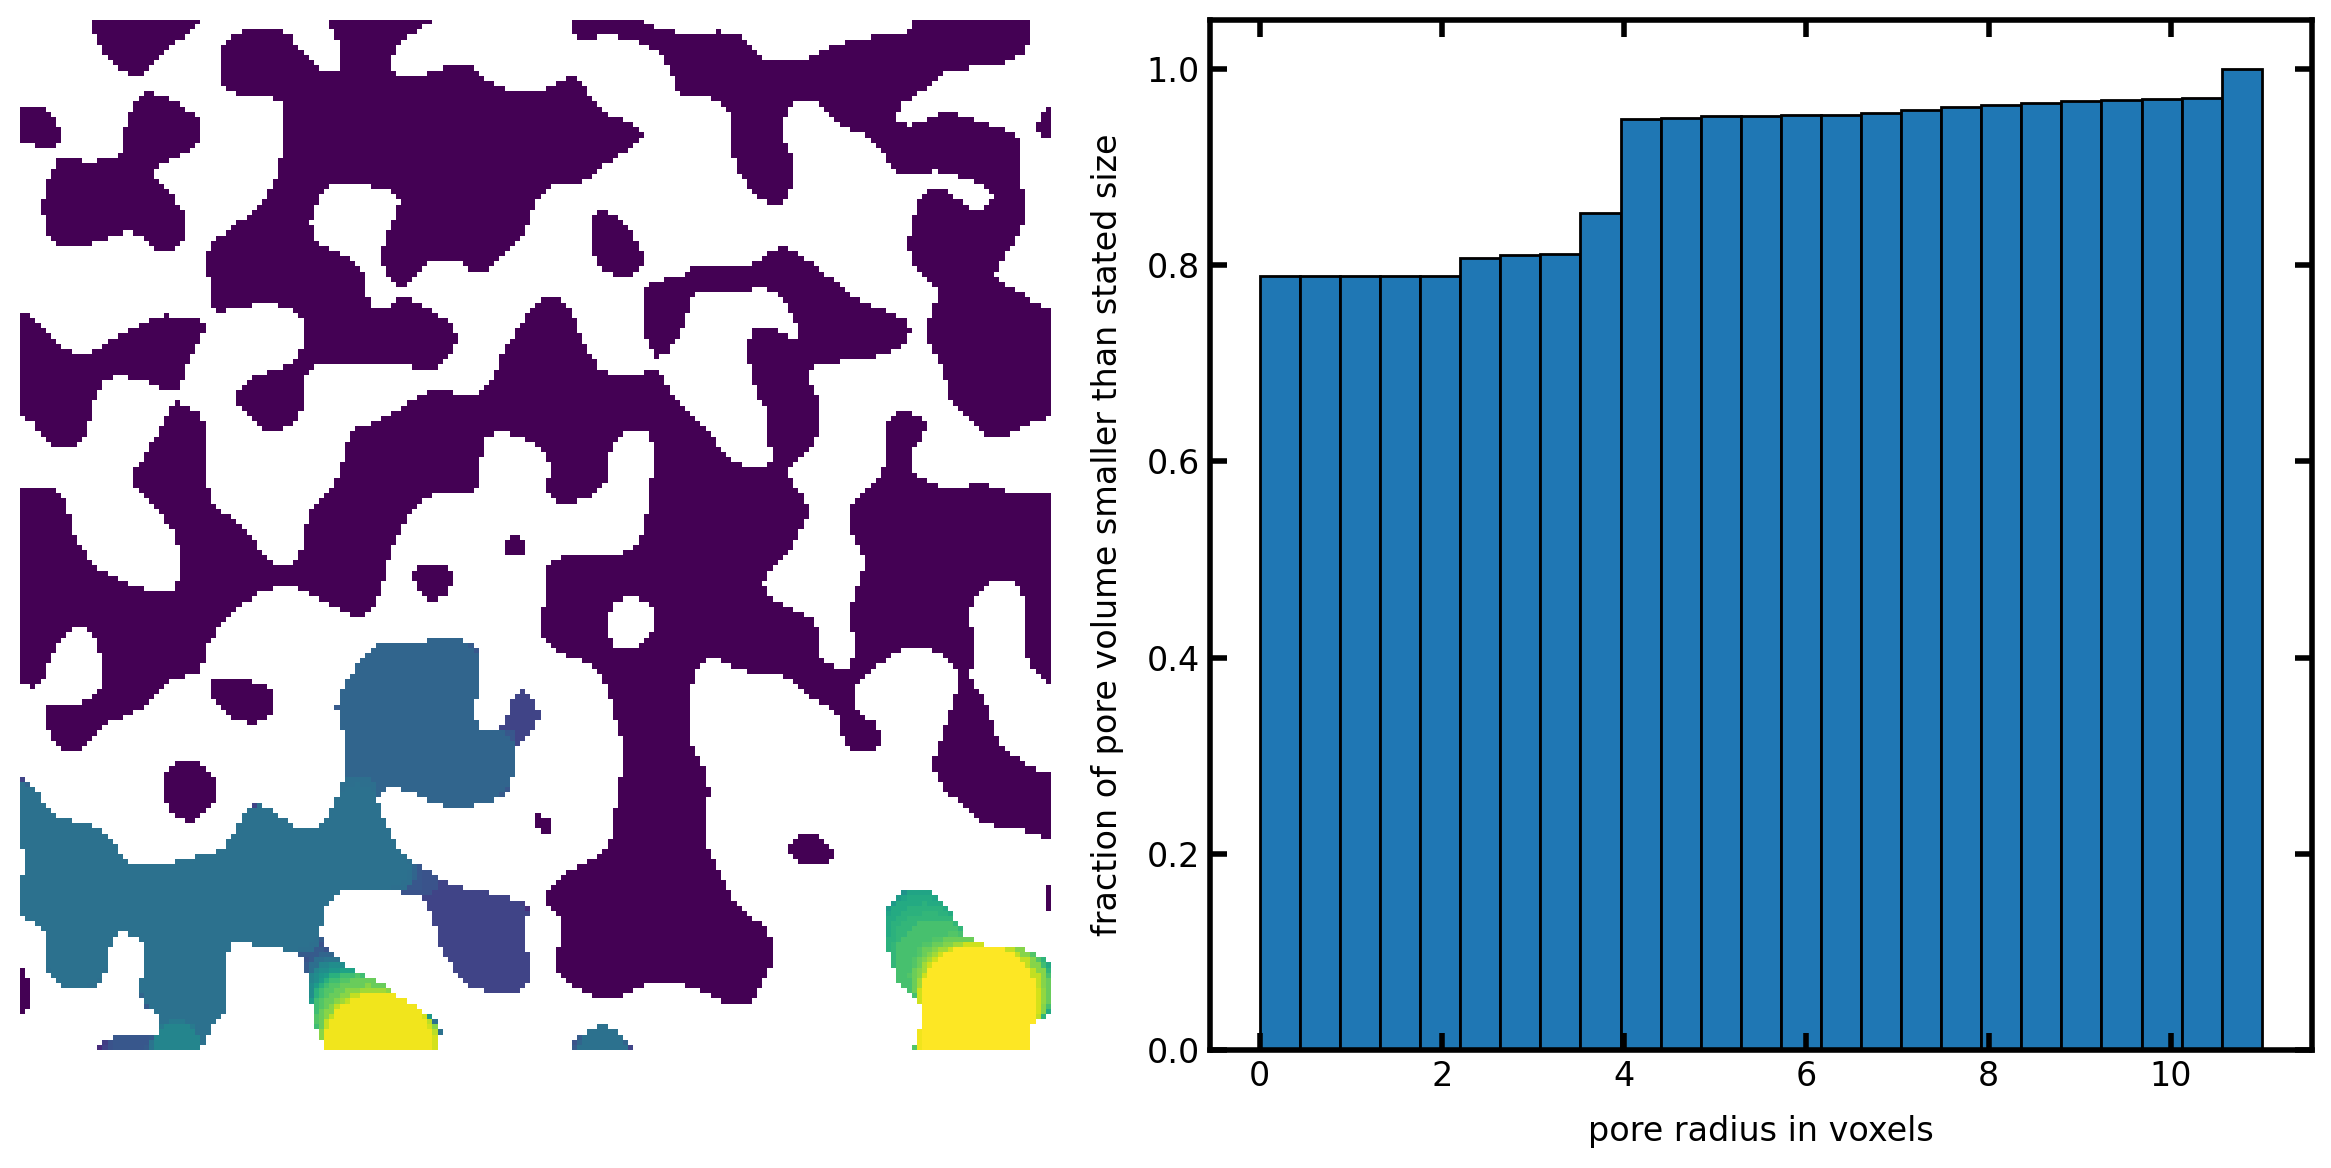

In [5]:
inlets = np.zeros_like(im)
inlets[0, ...] = True
sizes = ps.filters.porosimetry(im=im, inlets=inlets)
fig, ax = plt.subplots(1, 2, figsize=[12, 6])
ax[0].imshow(sizes/im, origin='lower', interpolation='none')
ax[0].axis(False)
ax[1].hist(sizes[im], bins=25, cumulative=True, edgecolor='k', density=True)
ax[1].set_xlabel('pore radius in voxels')
ax[1].set_ylabel('fraction of pore volume smaller than stated size');

## `method`
This controls which method is used.  The default is a 'dt' which uses a the threshold of a distance transform to perform an erosion, then additional distance transforms to perform the dilation to generate spheres.  Other options are `conv` which uses convolution for the dilation step, or 'dsi' which direct sphere insertion for the dilation. The selected method will affect the speed, but this depends on the computer being used.  All results should be exactly the same, and this is ensured in a unit test:

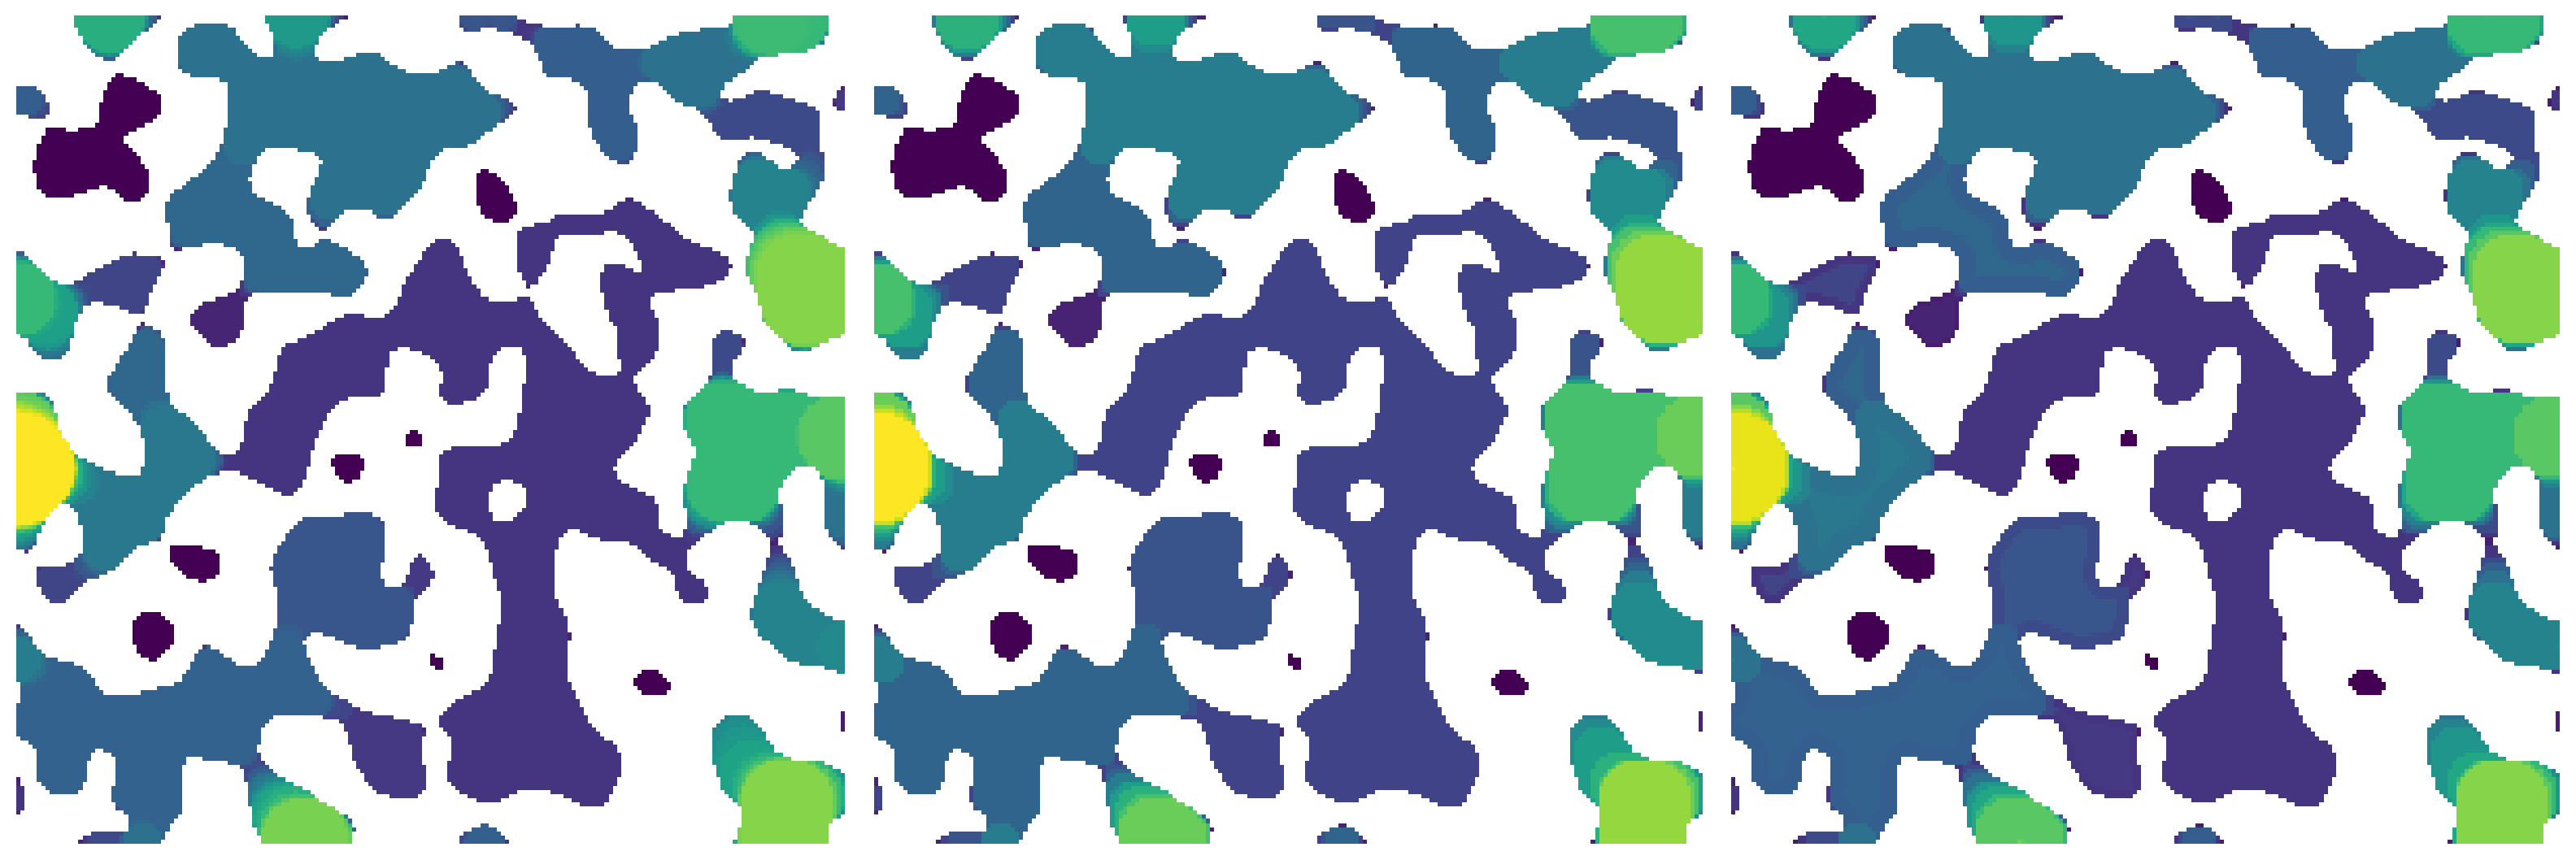

In [6]:
sizes1 = ps.filters.porosimetry(im=im, method='dt')
sizes2 = ps.filters.porosimetry(im=im, method='conv')
sizes3 = ps.filters.porosimetry(im=im, method='dsi')
fig, ax = plt.subplots(1, 3, figsize=[16, 6])
ax[0].imshow(sizes1/im, origin='lower', interpolation='none')
ax[0].axis(False)
ax[1].imshow(sizes2/im, origin='lower', interpolation='none')
ax[1].axis(False)
ax[2].imshow(sizes3/im, origin='lower', interpolation='none')
ax[2].axis(False);